In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_data=iris.data
iris_label = iris.target
iris_df = pd.DataFrame(data = iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 학습용 검증용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=10)

In [9]:
# DT 객체 생성
dt_clf = DecisionTreeClassifier()

# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
# 학습이 완료된 DT 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [11]:
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print(f' 예측 정확도 : {accuracy_score(y_test,pred)}')

 예측 정확도 : 0.9666666666666667


교차검증

- K Fold
- Stratified K Fold
- cross_val_score



In [12]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트를 분리
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0
for train_index, test_index in kfold.split(features):
    X_train,X_test = features[train_index],features[test_index]
    y_train,y_test = label[train_index],label[test_index]

    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"{n_iter}회차, 정확도 : {accuracy}, 학습용데이터 : {train_size}, 검증용 데이터 : {test_size}")
    print(f"{n_iter}회차 검증세트 인덱스 : {test_index}")
    cv_accuracy.append(accuracy)

print(f'평균 검증 정확도 : {np.mean(cv_accuracy)}')


1회차, 정확도 : 1.0, 학습용데이터 : 120, 검증용 데이터 : 30
1회차 검증세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2회차, 정확도 : 0.9667, 학습용데이터 : 120, 검증용 데이터 : 30
2회차 검증세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3회차, 정확도 : 0.8667, 학습용데이터 : 120, 검증용 데이터 : 30
3회차 검증세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4회차, 정확도 : 0.9333, 학습용데이터 : 120, 검증용 데이터 : 30
4회차 검증세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5회차, 정확도 : 0.7333, 학습용데이터 : 120, 검증용 데이터 : 30
5회차 검증세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.9


In [13]:
iris = load_iris()
irids_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [14]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index,test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포 : {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 : {label_test.value_counts()}')

1회차 교차검증
학습 레이블 데이터 분포 : 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 0    50
Name: label, dtype: int64
2회차 교차검증
학습 레이블 데이터 분포 : 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 1    50
Name: label, dtype: int64
3회차 교차검증
학습 레이블 데이터 분포 : 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 2    50
Name: label, dtype: int64


In [15]:
# stratifiedKfold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 
# 이 분포와 동일하게  학습과 검증 데이터 셋을 분리
from sklearn.model_selection import StratifiedKFold

iris_df_exlabel = iris_df.drop(['label'],axis=1)
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포 : {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 : {label_test.value_counts()}')

1회차 교차검증
학습 레이블 데이터 분포 : 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 0    17
1    17
2    16
Name: label, dtype: int64
2회차 교차검증
학습 레이블 데이터 분포 : 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 0    17
2    17
1    16
Name: label, dtype: int64
3회차 교차검증
학습 레이블 데이터 분포 : 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 1    17
2    17
0    16
Name: label, dtype: int64


[과제] 상기 케이스에 대한 교차 검증을 아래와 같이 수행하세요.
- 각 회차별 교차 검증 정확도 및 검증 세트 인덱스
- 평균 검증 정확도

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=3)
n_iter = 0
acc = []
data = iris_df.drop('label',axis=1)
for train_index,test_index in skf.split(data,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    dt.fit(data.iloc[train_index],iris_df['label'].iloc[train_index])
    pred = dt.predict(data.iloc[test_index])
    accuracy = np.round(accuracy_score(iris_df['label'].iloc[test_index],pred),4)
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 인덱스 : {label_train.index}')
    print(f'검증 레이블 인덱스 : {label_test.index}')
    print(f'검증 정확도 : {accuracy}')
    acc.append(accuracy)
    
print('평균 검증 정확도 : ', np.mean(acc))

1회차 교차검증
학습 레이블 인덱스 : Int64Index([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
             43,  44,  45,  46,  47,  48,  49,  67,  68,  69,  70,  71,  72,
             73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
             86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
             99, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
            128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
            141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64')
검증 레이블 인덱스 : Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  50,  51,  52,  53,  54,  55,  56,  57,  58,
             59,  60,  61,  62,  63,  64,  65,  66, 100, 101, 102, 103, 104,
            105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
           dtype='int64')
검증 정확도 : 0.98
2회차

In [31]:
# cross_val_score() : 교차 검증을 보다 간편하게
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
scores.mean()

0.9666666666666667

In [26]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}
grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)

grid_dtree.fit(X_train,y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.833333,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.833333,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,1
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,1
4,"{'max_depth': 3, 'min_samples_split': 2}",0.958333,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.950000,4


In [18]:
print('GridSearchCV 최적 파라미너 : ', grid_dtree.best_params_)
print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_}')

GridSearchCV 최적 파라미너 :  {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9583333333333334


In [19]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print(f'테스트 데이터 정확도 : {accuracy_score(y_test,pred)}')

테스트 데이터 정확도 : 0.8333333333333334


In [20]:
# 데이터 인코딩
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','믹서']
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
print(f'인코딩 반환값: {labels}')

인코딩 반환값: [0 1 4 5 3 2 2]


In [21]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

In [22]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서','믹서']
# 먼저 숫자값으로 변환
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels = labels.reshape(-1,1)
labels
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
oh_labels.toarray()

# pandas로 원핫인코딩
df = pd.DataFrame(items,columns=['label'])
pd.get_dummies(df)

,label_TV,label_냉장고,label_믹서,label_선풍기,label_전자렌지,label_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


In [23]:
# 피쳐 스케일링과 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data = iris_scaled,columns=iris_df.columns)
display(iris_scaled_df.head())
print(f'평균 : {iris_scaled_df.mean()}')
print(f'분산 : {iris_scaled_df.var()}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


평균 : sepal length (cm)   -2.775558e-16
sepal width (cm)    -9.695948e-16
petal length (cm)   -8.652338e-16
petal width (cm)    -4.662937e-16
label                1.184238e-17
dtype: float64
분산 : sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
label                1.006711
dtype: float64


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris_df_ms = scaler.fit_transform(iris_df)
ms_df = pd.DataFrame(data=iris_df_ms,columns=iris_df.columns)
display(ms_df)
print(f'평균 \n {ms_df.mean()}')
print(f'최대값 \n {ms_df.max()}')
print(f'최소값 \n {ms_df.min()}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


평균 
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
label                0.500000
dtype: float64
최대값 
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
label                1.0
dtype: float64
최소값 
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
label                0.0
dtype: float64


[과제] train.csv 데이터로 생존자 분석 예측을 위한 분석용 데이터셋을 하나의 전처리 사용자 함수를 이용하여 작성한 후 모델링 및 성능평가
를 수행하세요. 단(전처리는 5개 이상 정확도는 0.85 이상)

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
t_df_ori = pd.read_csv('./dataset/train.csv')
t_df = t_df_ori.copy()
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
# 우선적으로 결측치부터 처리하기로 결정
print(t_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
# Embarked 결측치 처리
t_df.Embarked.value_counts() # S가 최빈값이므로 S로 결측치를 채움
t_df.Embarked.fillna('S',inplace=True)
print(t_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [29]:
# Cabin은 너무 결측치가 많고 값도 다양하기 때문에 삭제
t_df.drop('Cabin',axis=1,inplace=True)
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
# Age는 Name의 호칭부분만 추출하여 호칭의 평균값으로 나이를 대체하기로 결정
# Name의 두번째 단어가 호칭이므로 호칭을 추출
title = []
for i in t_df.Name:
    t = i.split(', ')[1].split('.')[0]
    title.append(t)
t_df['Title'] = title
t_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [31]:
t_df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [32]:
# 호칭의 나이 평균으로 결측치 대체
print(t_df.Title[t_df.Age.isnull()].unique())
for i in t_df.Title[t_df.Age.isnull()].unique():
    t_df.Age.loc[(t_df.Age.isnull())&(t_df.Title == i)]  = t_df.Age[t_df.Title == i].mean() 
t_df.isnull().sum()

['Mr' 'Mrs' 'Miss' 'Master' 'Dr']


C:\Users\admin\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

<AxesSubplot:xlabel='Title'>

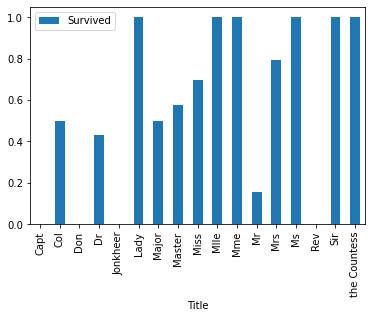

In [33]:
# 호칭별 생존률
t_df[['Title','Survived']].groupby('Title').mean().plot(kind='bar')

In [34]:
# 호칭별 숫자
t_df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [35]:
#호칭의 갯수가 Dr부터는 other로 통일
def title(title):
    t = []
    if title == 'Mr' : t = 'Mr'
    elif title == 'Miss' : t = 'Miss'
    elif title == 'Mrs' : t = 'Mrs'
    elif title == 'Master' : t = 'Master'
    else: t = 'Others'
    return t

t_df['Title'] = t_df.Title.apply(lambda x : title(x))

t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<AxesSubplot:xlabel='Sex'>

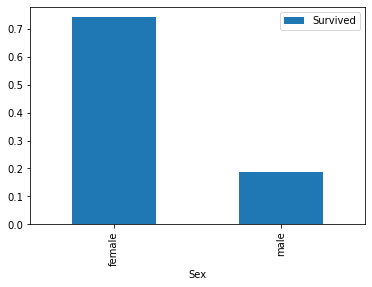

In [36]:
# 성별별 생존률
t_df[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')

In [37]:
# SibSp와 Parch는 더해서 Family 칼럼으로 통일
t_df['Family'] = t_df.SibSp + t_df.Parch
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [38]:
# Age를 범주화
def Agecat(age):
    cat = []
    if age < 10 : cat = '0'
    elif age < 20 : cat = '1'
    elif age < 30 : cat = '2'
    elif age < 40 : cat = '3'
    elif age < 50 : cat = '4'
    elif age < 60 : cat = '5'
    else : cat = '6'
    return cat

t_df['Agecat'] = t_df.Age.apply(lambda x : Agecat(x))
t_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Agecat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,3


In [39]:
# Fare은 가족의 경우 가족의 모든 요금이므로 가족수로 나눠줌
t_df['Fare_person']=np.zeros(len(t_df))
t_df.loc[(t_df.Family==0),'Fare_person']=t_df.Fare
t_df.loc[(t_df.Family!=0),'Fare_person']=t_df.Fare/(t_df.Family+1)
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Agecat,Fare_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,3,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,2,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,3,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,3,8.05000


<AxesSubplot:ylabel='Frequency'>

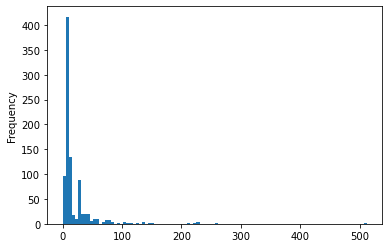

In [40]:
# Fare_person는 20 이하가 대부분을 차지함
t_df.Fare_person.plot(kind='hist',bins=100)

In [41]:
# Fare_person 범주화
t_df[['Pclass','Fare_person']].groupby('Pclass').describe()

Fare_person                                                      \
             count       mean        std  min      25%      50%    75%   
Pclass                                                                   
1            216.0  52.936943  60.926142  0.0  26.5500  33.7604  52.00   
2            184.0  12.698832   8.049364  0.0  10.5000  13.0000  13.00   
3            491.0   8.094756   6.330092  0.0   6.7375   7.7500   8.05   

                  
             max  
Pclass            
1       512.3292  
2        73.5000  
3        56.4958

In [42]:
# Pcalss 3의 75%값과 Pclass 2의 25%값의 평균과 Pcalss 2의 75%값과 Pclass 1의 25%값의 평균을 기준으로 범주화
def Farecut(fare):
    farecut = []
    if fare < 9.5 : farecut = 0
    elif fare < 19.775 : farecut = 1
    else : farecut = 2
    return farecut

t_df['Farecat'] = t_df.Fare_person.apply(lambda x : Farecut(x))
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Agecat,Fare_person,Farecat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,2,3.62500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,3,35.64165,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,2,7.92500,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,3,26.55000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,3,8.05000,0


In [43]:
# 필요없다 생각되는것 삭제
t_df1 = t_df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Fare_person'],axis=1)
t_df1.head()

,Survived,Pclass,Sex,Embarked,Title,Family,Agecat,Farecat
0,0,3,male,S,Mr,1,2,0
1,1,1,female,C,Mrs,1,3,2
2,1,3,female,S,Miss,0,2,0
3,1,1,female,S,Mrs,1,3,2
4,0,3,male,S,Mr,0,3,0


In [44]:
le = LabelEncoder()
t_df1.Sex = le.fit_transform(t_df1.Sex)
t_df1.Title = le.fit_transform(t_df1.Title)
t_df1
t_df2 = pd.concat([pd.get_dummies(t_df1.Embarked),t_df1],axis=1)
t_df2.drop('Embarked',axis=1,inplace=True)
t_df2.head()

,C,Q,S,Survived,Pclass,Sex,Title,Family,Agecat,Farecat
0,0,0,1,0,3,1,2,1,2,0
1,1,0,0,1,1,0,3,1,3,2
2,0,0,1,1,3,0,1,0,2,0
3,0,0,1,1,1,0,3,1,3,2
4,0,0,1,0,3,1,2,0,3,0


In [108]:
X_train,X_test,y_train,y_test = train_test_split(t_df2.drop('Survived',axis=1),t_df2.Survived,test_size=0.2,random_state=0)
dtree = DecisionTreeClassifier()
# 학습 수행

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3,5],'min_samples_leaf':[1,2,3]}
grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)

grid_dtree.fit(X_train,y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
display(scores_df[['params','mean_test_score','rank_test_score']])

best_dtree = grid_dtree.best_estimator_
pred = best_dtree.predict(X_test)
print(f' 최적화된 dtree 예측 정확도 : {accuracy_score(y_test,pred)}')
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForest 정확도 : {accuracy_score(y_test,rf_pred)}')
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도 : {accuracy_score(y_test,lr_pred)}')

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.786553,10
1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.786553,10
2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.786553,10
3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.786553,10
4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.786553,10
5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.786553,10
6,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.786553,10
7,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.786553,10
8,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.786553,10
9,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.776696,19


 최적화된 dtree 예측 정확도 : 0.8324022346368715
RandomForest 정확도 : 0.8268156424581006
LogisticRegression 정확도 : 0.8156424581005587
